In [1]:
import mne
import pandas as pd
import os

import matplotlib.pyplot as plt


import numpy as np
import platform

import sys
if platform.system()=='Darwin':
    os.chdir('/Volumes/BBC/BBC/WP1/data/EEG/tsk/')
    sys.path.append('/Users/leupinv/BBC/WP1/data/Code/python/BBC')
    #if this doesn't work pound line right above this, restart the kernel, rerun the cell.
    #Then uncomment the same line and rerun

else:
    #os.chdir('Z:/BBC/WP1/data/EEG/tsk')
    sys.path.append('C:/Users/Vivi/switchdrive/BBC/WP1/data/Code/python/BBC')
    os.chdir('Z:/BBC/WP1/data/EEG/tsk')

from base.files_in_out import GetFiles
from stats.stats_helper import filter_list, tTest_ana, filter_list_equal
import stats.stats_helper as s_hp


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/datasets/eegbci/eegbci.py:8: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False
plt.style.use('default')

mpl.rcParams['svg.fonttype']='none'
mpl.rcParams['text.usetex']=False

In [3]:
g_num=None
eeg_format='-ave.fif'
eeg_exp='tsk'
datafolder='ana/MNE/evo_list'


#files = getListOfFiles(datafolder,g_num)

files = GetFiles(datafolder,g_num=g_num,eeg_format=eeg_format)

evo_files=files.fflist

In [4]:
evo_files

['ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_exh_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_aware_sys_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_aware_exh_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_inh_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_unaware_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_sys_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_aware_inh_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_dia_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_aware_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/correct/nc/xns/easy/maskOFF_correct_nc_xns_easy_aware_dia_list-ave.fif',
 'ana/MNE/evo_list/maskOFF/cor

## Figure 5
plot time course of erp amplitude (panel a top + b top) over LP electrodes + time course of eff size (panel a bottom + b bottom). Topoplot of LP between CA and CU (Panel c + d )

# T values time course template

In [59]:
def crop_list(list_ev,crop_value):
    list_cropped=[]
    for cond in list_ev:
        cond_crop=[evo.crop(crop_value[0],crop_value[1]) for evo in cond]
        list_cropped.append(cond_crop)
    return list_cropped




In [60]:


picks_LP=['A2','A3','A4','A19','A20','A21','A22','A32','A31','A30','A29','A5','A18',
          'A17','A16','A8','A9','A6','A7','D29','D30','D15','D16','D17','D28','D27']





In [61]:
crop_value=[-0.1,0.5]
phy_sig='cardiac_phase'
rsp_cond='o'
picks_ERP={'LP':picks_LP}

In [62]:
%matplotlib qt
#cm=1/2.54 #cm in inches
fig_fin,(ax1,ax2)=plt.subplots(2,figsize=(7,10))

In [ ]:
%%sql


## Define df  for VAN picture
the barplot is based on the P1 electrodes while the lineplots are based on the VAN
unfortunately i need to reload the evoked, i cannot find a way of safely deep copy the objects, so the info structure get modified and some channels are dropped

In [63]:
%matplotlib qt
cond_1_awa="aware_"
cond_2_awa="unaware_"

if phy_sig=='rsp_phase':
    cond_1_phy="inh"
    cond_2_phy="exh"

elif phy_sig=='cardiac_phase':
    cond_1_phy="sys"
    cond_2_phy="dia"
elif phy_sig==None:
    cond_1_phy=""
    cond_2_phy=""


cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_1_phy}_list'))
cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_1_phy}_list'))
cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_2_phy}_list'))
cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_2_phy}_list'))
#picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
#'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']


cond_1,cond_2,cond_3,cond_4=crop_list([cond_1,cond_2,cond_3,cond_4],crop_value)

#picks=['A13','A14','A24','A25','A26','A27']
#picks=['A7','A9','A19','D29','D30','D31']
#picks=['A26','B8','B9','B10']
cond_1_lab=f"{cond_1_awa}{cond_1_phy}"
cond_2_lab=f"{cond_2_awa}{cond_1_phy}"
cond_3_lab=f"{cond_1_awa}{cond_2_phy}"
cond_4_lab=f"{cond_2_awa}{cond_2_phy}"
evokeds = {f"{cond_1_lab}":cond_1,

           f"{cond_2_lab}":cond_2,

           f"{cond_3_lab}":cond_3,

           f"{cond_4_lab}":cond_4}





ana/MNE/evo_list/maskON/mistake/cfa/vep/norm/maskON_mistake_cfa_vep_norm_unaware_exh_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_sys_list-ave.fif ...


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read(4), d

    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.42 × vep/normal/correct/aware/sys/exh + 0.58 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 95 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.40 × vep/normal/correct/aware/sys/exh + 0.60 × vep/normal/correct/aware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 121 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.50 × vep/normal/correct/aware/sys/exh + 0.50 × vep/normal/correct/aware/sys/inh
 G_n= g12)
        0 CTF compensation matrices available
        nave = 128 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/sys/exh + 0.53 × vep/normal/correct/aware/sys/inh
 G_n= g15)
        0 CTF compensation matrices available
        nave = 120 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.51 × vep/normal/correct/aware/sys/exh + 0.

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.37 × vep/normal/correct/aware/sys/exh + 0.63 × vep/normal/correct/aware/sys/inh
 G_n= g24)
        0 CTF compensation matrices available
        nave = 156 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.55 × vep/normal/correct/aware/sys/exh + 0.45 × vep/normal/correct/aware/sys/inh
 G_n= g25)
        0 CTF compensation matrices available
        nave = 187 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.66 × vep/normal/correct/aware/sys/exh + 0.

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.54 × vep/normal/correct/aware/sys/exh + 0.46 × vep/normal/correct/aware/sys/inh
 G_n= g37)
        0 CTF compensation matrices available
        nave = 106 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.57 × vep/normal/correct/aware/sys/exh + 0.43 × vep/normal/correct/aware/sys/inh
 G_n= g38)
        0 CTF compensation matrices available
        nave = 138 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.74 × vep/normal/correct/aware/sys/exh + 0.

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/aware/sys/exh + 0.51 × vep/normal/correct/aware/sys/inh
 G_n= g44)
        0 CTF compensation matrices available
        nave = 124 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.59 × vep/normal/correct/aware/sys/exh + 0.41 × vep/normal/correct/aware/sys/inh
 G_n= g45)
        0 CTF compensation matrices available
        nave = 140 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.40 × vep/normal/correct/aware/sys/exh + 0.

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.60 × vep/normal/correct/aware/sys/exh + 0.40 × vep/normal/correct/aware/sys/inh
 G_n= g52)
        0 CTF compensation matrices available
        nave = 206 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
ana/MNE/evo_list/maskON/mistake/cfa/vep/norm/maskON_mistake_cfa_vep_norm_unaware_exh_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_unaware_sys_list-ave.fif ...


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read(4), d

    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/unaware/sys/exh + 0.51 × vep/normal/correct/unaware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 79 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.38 × vep/normal/correct/unaware/sys/exh + 0.62 × vep/normal/correct/unaware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 85 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of int

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.59 × vep/normal/correct/unaware/sys/exh + 0.41 × vep/normal/correct/unaware/sys/inh
 G_n= g12)
        0 CTF compensation matrices available
        nave = 127 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/unaware/sys/exh + 0.44 × vep/normal/correct/unaware/sys/inh
 G_n= g15)
        0 CTF compensation matrices available
        nave = 153 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.58 × vep/normal/correct/unaware/sy

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.33 × vep/normal/correct/unaware/sys/exh + 0.67 × vep/normal/correct/unaware/sys/inh
 G_n= g24)
        0 CTF compensation matrices available
        nave = 125 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.65 × vep/normal/correct/unaware/sys/exh + 0.35 × vep/normal/correct/unaware/sys/inh
 G_n= g25)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.69 × vep/normal/correct/unaware/sys

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.59 × vep/normal/correct/unaware/sys/exh + 0.41 × vep/normal/correct/unaware/sys/inh
 G_n= g37)
        0 CTF compensation matrices available
        nave = 163 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.58 × vep/normal/correct/unaware/sys/exh + 0.42 × vep/normal/correct/unaware/sys/inh
 G_n= g38)
        0 CTF compensation matrices available
        nave = 127 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.71 × vep/normal/correct/unaware/sy

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/unaware/sys/exh + 0.44 × vep/normal/correct/unaware/sys/inh
 G_n= g44)
        0 CTF compensation matrices available
        nave = 169 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.61 × vep/normal/correct/unaware/sys/exh + 0.39 × vep/normal/correct/unaware/sys/inh
 G_n= g45)
        0 CTF compensation matrices available
        nave = 82 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read(4), d

    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.48 × vep/normal/correct/unaware/sys/exh + 0.52 × vep/normal/correct/unaware/sys/inh
 G_n= g46)
        0 CTF compensation matrices available
        nave = 63 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/unaware/sys/exh + 0.53 × vep/normal/correct/unaware/sys/inh
 G_n= g47)
        0 CTF compensation matrices available
        nave = 118 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/unaware/sys

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.60 × vep/normal/correct/unaware/sys/exh + 0.40 × vep/normal/correct/unaware/sys/inh
 G_n= g51)
        0 CTF compensation matrices available
        nave = 67 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.64 × vep/normal/correct/unaware/sys/exh + 0.36 × vep/normal/correct/unaware/sys/inh
 G_n= g52)
        0 CTF compensation matrices available
        nave = 165 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
ana/MNE/evo_list/maskON/mistake/cfa/vep/norm/maskON_mistake_cfa_vep_norm_unaware_exh_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_dia_lis

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/open.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dirpos = int(tag.data)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:299: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  version=int(np.frombuffer(fid.read(4), dtype=">i4")),
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:301: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  secs=int(np.frombuffer(fid.read(4), d

    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/exh + 0.53 × vep/normal/correct/aware/dia/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 92 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.38 × vep/normal/correct/aware/dia/exh + 0.62 × vep/normal/correct/aware/dia/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 129 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.48 × vep/normal/correct/aware/dia/exh + 0.52 × vep/normal/correct/aware/dia/inh
 G_n= g11)
        0 CTF compensation matrices available
        nave = 128 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.60 × vep/normal/correct/aware/dia/exh + 0.40 × vep/normal/correct/aware/dia/inh
 G_n= g12)
        0 CTF compensation matrices available
        nave = 101 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.29 × vep/normal/correct/aware/dia/exh + 0.71 × vep/normal/correct/aware/dia/inh
 G_n= g17)
        0 CTF compensation matrices available
        nave = 106 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.44 × vep/normal/correct/aware/dia/exh + 0.56 × vep/normal/correct/aware/dia/inh
 G_n= g19)
        0 CTF compensation matrices available
        nave = 133 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.64 × vep/normal/correct/aware/dia/exh + 0.

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.62 × vep/normal/correct/aware/dia/exh + 0.38 × vep/normal/correct/aware/dia/inh
 G_n= g28)
        0 CTF compensation matrices available
        nave = 93 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/aware/dia/exh + 0.48 × vep/normal/correct/aware/dia/inh
 G_n= g32)
        0 CTF compensation matrices available
        nave = 185 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/aware/dia/exh + 0.4

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.64 × vep/normal/correct/aware/dia/exh + 0.36 × vep/normal/correct/aware/dia/inh
 G_n= g39)
        0 CTF compensation matrices available
        nave = 85 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.64 × vep/normal/correct/aware/dia/exh + 0.36 × vep/normal/correct/aware/dia/inh
 G_n= g40)
        0 CTF compensation matrices available
        nave = 98 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.58 × vep/normal/correct/aware/dia/exh + 0.42 × vep/normal/correct/aware/dia/inh
 G_n= g45)
        0 CTF compensation matrices available
        nave = 140 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.32 × vep/normal/correct/aware/dia/exh + 0.68 × vep/normal/correct/aware/dia/inh
 G_n= g46)
        0 CTF compensation matrices available
        nave = 114 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.63 × vep/normal/correct/aware/dia/exh + 0.37 × vep/normal/correct/aware/dia/inh
 G_n= g52)
        0 CTF compensation matrices available
        nave = 204 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
ana/MNE/evo_list/maskON/mistake/cfa/vep/norm/maskON_mistake_cfa_vep_norm_unaware_exh_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_unaware_dia_list-ave.fif ...


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kind = int(np.frombuffer(fid.read(4), dtype=">i4"))
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:309: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ident = int(np.frombuffer(fid.read(4), dtype=">i4"))
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tag.py:307: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  kind = int

    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.44 × vep/normal/correct/unaware/dia/exh + 0.56 × vep/normal/correct/unaware/dia/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 77 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.39 × vep/normal/correct/unaware/dia/exh + 0.61 × vep/normal/correct/unaware/dia/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 110 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of in

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.51 × vep/normal/correct/unaware/dia/exh + 0.49 × vep/normal/correct/unaware/dia/inh
 G_n= g11)
        0 CTF compensation matrices available
        nave = 154 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.59 × vep/normal/correct/unaware/dia/exh + 0.41 × vep/normal/correct/unaware/dia/inh
 G_n= g12)
        0 CTF compensation matrices available
        nave = 119 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.46 × vep/normal/correct/unaware/di

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.51 × vep/normal/correct/unaware/dia/exh + 0.49 × vep/normal/correct/unaware/dia/inh
 G_n= g23)
        0 CTF compensation matrices available
        nave = 59 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.37 × vep/normal/correct/unaware/dia/exh + 0.63 × vep/normal/correct/unaware/dia/inh
 G_n= g24)
        0 CTF compensation matrices available
        nave = 106 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.42 × vep/normal/correct/unaware/dia

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.65 × vep/normal/correct/unaware/dia/exh + 0.35 × vep/normal/correct/unaware/dia/inh
 G_n= g34)
        0 CTF compensation matrices available
        nave = 96 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.51 × vep/normal/correct/unaware/dia/exh + 0.49 × vep/normal/correct/unaware/dia/inh
 G_n= g37)
        0 CTF compensation matrices available
        nave = 185 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.59 × vep/normal/correct/unaware/dia

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.40 × vep/normal/correct/unaware/dia/exh + 0.60 × vep/normal/correct/unaware/dia/inh
 G_n= g42)
        0 CTF compensation matrices available
        nave = 80 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.45 × vep/normal/correct/unaware/dia/exh + 0.55 × vep/normal/correct/unaware/dia/inh
 G_n= g44)
        0 CTF compensation matrices available
        nave = 142 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of in

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/unaware/dia/exh + 0.44 × vep/normal/correct/unaware/dia/inh
 G_n= g49)
        0 CTF compensation matrices available
        nave = 143 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/unaware/dia/exh + 0.53 × vep/normal/correct/unaware/dia/inh
 G_n= g51)
        0 CTF compensation matrices available
        nave = 70 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of in

/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tree.py:111: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.debug('    ' * indent + 'end } %d' % block)
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tree.py:109: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  logger.debug('    ' * (indent + 1) + 'block = %d nent = %d nchild = %d'
/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/io/tree.py:111: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumP

In [64]:
region_ax2="LP"

picked=picks_ERP[region_ax2]
if phy_sig=='rsp_phase':
    colors=['olivedrab','tab:green','tab:pink','purple']
elif phy_sig=='cardiac_phase':
    colors=['tab:orange','r','c','b']
#fig_fin,axs=plt.subplots(2,figsize=(8,12))

fig_fin=mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picked,show_sensors=True,colors=colors,
                                     styles={cond_1_lab:{"linewidth":1.5},cond_2_lab:{"linewidth":1.5},cond_3_lab:{"linewidth":1.5},cond_4_lab:{"linewidth":1.5}},axes=ax1,
                                    legend='upper right',linestyles=['-.','-','-.','-'],ylim=dict(eeg=[-2,3]),truncate_yaxis=False)
fig_fin=fig_fin[0]

#ylim=dict(eeg=[-3,5.5])

#png=f'{rsp_cond_lab}CACU_{phy_sig}_{region_ax2}.svg'
#fig_path=f'ana/results_report/images/el_waveform/{png}'


#fig_evo[0].savefig(fig_path,dpi=600,format='svg')




More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


In [65]:
if phy_sig=='rsp_phase':
    png1='Aware - unaware inh'
    png2='Aware - unaware exh'
    color_1='tab:green'
    color_2='tab:pink'
elif phy_sig=='cardiac_phase':
    png1='Aware - unaware sys'
    png2='Aware - unaware dia'
    color_1='tab:orange'
    color_2='blue'



ts=tTest_ana([cond_1,cond_2],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png1,color=color_1,effect_size='whole',axes=ax2, ylim_picks=(-0.5,1.3))
ts=tTest_ana([cond_3,cond_4],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png2,color=color_2,effect_size='whole',axes=ax2,ylim_picks=(-0.5,1.3))

#plt.tight_layout()
#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)
#plt.tight_layout()


png=f'{rsp_cond_lab}CACU_{phy_sig}_{region_ax2}.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'

fig_fin.savefig(fig_path,dpi=1200,format='svg')



(30, 26, 155)
(30, 26, 155)
(155,)
(155,)
showing effect sizes
155
(30, 26, 155)
(30, 26, 155)
(155,)
(155,)
showing effect sizes
155


In [51]:
fig_fin.show()

### plot mass univariate +  LP  time period

In [35]:
%matplotlib qt
data_shape=[-0.1,0.5]
time_plot=[0.45]
png=f'{rsp_cond_lab}_FDR_CACU_{phy_cond}{time_plot}'
ts,ps=tTest_ana([cond1,cond2],crop_value=data_shape,FDR=True,plot_times=time_plot,averages=0.05,p_val=0.05, topo_limits=[-6,6], png=png)

(30, 128, 155)
(30, 128, 155)
-0.1
number of time pointst: 25
length of minimum time points to be significant: 12.0
(128, 155)


/opt/anaconda3/envs/mne/lib/python3.12/site-packages/mne/viz/topomap.py:976: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  for col in cont.collections:


# Test t values picture

In [26]:
crop_value=[-0.1,0.5]
phy_sig='rsp_phase'
rsp_cond='o'
picks_ERP={'P1':picks_P1_o,'VAN':picks_VAN,'LP':picks_LP,'P3a':picks_P3a,'P1_n':picks_P1_n}
if rsp_cond=='o':
    rsp_cond_lab='tsk_o_'
elif rsp_cond=='n':
    rsp_cond_lab=''

In [18]:
def reload_evoked(cond_1_awa,cond_2_awa,phy_sig):
    if phy_sig=='rsp_phase':
        cond_1_phy="inh"
        cond_2_phy="exh"

    elif phy_sig=='cardiac_phase':
        cond_1_phy="sys"
        cond_2_phy="dia"
    elif phy_sig==None:
        cond_1_phy=""
        cond_2_phy=""
    cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_1_phy}_list'))
    cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_1_phy}_list'))
    cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_2_phy}_list'))
    cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_2_phy}_list'))
    #picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
    #'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']


    cond_1,cond_2,cond_3,cond_4=crop_list([cond_1,cond_2,cond_3,cond_4],crop_value)

    #picks=['A13','A14','A24','A25','A26','A27']
    #picks=['A7','A9','A19','D29','D30','D31']
    #picks=['A26','B8','B9','B10']
    cond_1_lab=f"{cond_1_awa}{cond_1_phy}"
    cond_2_lab=f"{cond_2_awa}{cond_1_phy}"
    cond_3_lab=f"{cond_1_awa}{cond_2_phy}"
    cond_4_lab=f"{cond_2_awa}{cond_2_phy}"
    cond_labs=[cond_1_lab,cond_2_lab,cond_3_lab,cond_4_lab]
    evokeds_1 = {f"{cond_1_lab}":cond_1,
                 f"{cond_2_lab}":cond_2}
    evokeds_2 ={
        f"{cond_3_lab}":cond_3,
        f"{cond_4_lab}":cond_4}
    return evokeds_1,evokeds_2,cond_labs


In [27]:
%matplotlib qt
cond_1_awa="aware_"
cond_2_awa="unaware_"

evokeds_1,evokeds_2,cond_labs=reload_evoked(cond_1_awa,cond_2_awa,phy_sig)


ana/MNE/evo_list/maskON/mistake/nc/xns/norm/maskON_mistake_nc_xns_norm_unaware_sys_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_inh_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/inh + 0.53 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 104 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/aware/dia/inh + 0.48 × vep/normal/correct/aware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 153 - aspect type = 100
Projection

    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/inh + 0.53 × vep/normal/correct/aware/sys/inh
 G_n= g38)
        0 CTF compensation matrices available
        nave = 113 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.55 × vep/normal/correct/aware/dia/inh + 0.45 × vep/normal/correct/aware/sys/inh
 G_n= g39)
        0 CTF compensation matrices available
        nave = 56 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.50 × vep/normal/correct/aware/dia/inh + 0.5

        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/unaware/dia/inh + 0.44 × vep/normal/correct/unaware/sys/inh
 G_n= g15)
        0 CTF compensation matrices available
        nave = 154 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/unaware/dia/inh + 0.48 × vep/normal/correct/unaware/sys/inh
 G_n= g16)
        0 CTF compensation matrices available
        nave = 112 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.46 × vep/normal/correct/unaware/dia/inh + 0.54 × vep/normal/correc

Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/unaware/dia/inh + 0.51 × vep/normal/correct/unaware/sys/inh
 G_n= g46)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/unaware/dia/inh + 0.48 × vep/normal/correct/unaware/sys/inh
 G_n= g47)
        0 CTF compensation matrices available
        nave = 130 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read 

No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.46 × vep/normal/correct/aware/dia/exh + 0.54 × vep/normal/correct/aware/sys/exh
 G_n= g28)
        0 CTF compensation matrices available
        nave = 127 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.44 × vep/normal/correct/aware/dia/exh + 0.56 × vep/normal/correct/aware/sys/exh
 G_n= g32)
        0 CTF compensation matrices available
        nave = 216 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active


        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.57 × vep/normal/correct/unaware/dia/exh + 0.43 × vep/normal/correct/unaware/sys/exh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.45 × vep/normal/correct/unaware/dia/exh + 0.55 × vep/normal/correct/unaware/sys/exh
 G_n= g08)
        0 CTF compensation matrices available
        nave = 128 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    10

        0 CTF compensation matrices available
        nave = 228 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.48 × vep/normal/correct/unaware/dia/exh + 0.52 × vep/normal/correct/unaware/sys/exh
 G_n= g40)
        0 CTF compensation matrices available
        nave = 127 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.51 × vep/normal/correct/unaware/dia/exh + 0.49 × vep/normal/correct/unaware/sys/exh
 G_n= g41)
        0 CTF compensation matrices available
        nave = 96 - aspect type = 100
Projections have already b

In [28]:
region_1="VAN"
region_2='P3a'

picked_1=picks_ERP[region_1]
picked_2=picks_ERP[region_2]
#gridspec_kw={'width_ratios':[2,3]
fig_fin,(ax1,ax2)=plt.subplots(2,1,figsize=(10,20))

if phy_sig=='rsp_phase':
    png1='Aware - unaware inh'
    png2='Aware - unaware exh'
    color_1='tab:green'
    color_2='tab:pink'
elif phy_sig=='cardiac_phase':
    png1='Aware - unaware sys'
    png2='Aware - unaware dia'
    color_1='tab:orange'
    color_2='blue'



ts_1,mask_1=tTest_ana([evokeds_1[cond_labs[0]],evokeds_1[cond_labs[1]]],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked_1,png=png1,color=color_1,effect_size=False,axes=ax1)
evokeds_1,evokeds_2,cond_labs=reload_evoked(cond_1_awa,cond_2_awa,phy_sig)
ts_1,mask_1=tTest_ana([evokeds_1[cond_labs[0]],evokeds_1[cond_labs[1]]],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked_2,png=png1,color=color_1,effect_size=False,axes=ax1)
ts_2,mask_2=tTest_ana([evokeds_2[cond_labs[2]],evokeds_2[cond_labs[3]]],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked_1,png=png2,color=color_2,effect_size=False,axes=ax2)
evokeds_1,evokeds_2,cond_labs=reload_evoked(cond_1_awa,cond_2_awa,phy_sig)
ts_2,mask_2=tTest_ana([evokeds_2[cond_labs[2]],evokeds_2[cond_labs[3]]],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked_2,png=png2,color=color_2,effect_size=False,axes=ax2)

#plt.tight_layout()
#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)
#plt.tight_layout()


png=f'{rsp_cond_lab}CACU_{phy_sig}_T_val_nested_{region_1}_{region_2}.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'
fig_fin.savefig(fig_path,dpi=1200,format='svg')



(30, 22, 155)
(30, 22, 155)
155
ana/MNE/evo_list/maskON/mistake/nc/xns/norm/maskON_mistake_nc_xns_norm_unaware_sys_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_inh_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/inh + 0.53 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 104 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/aware/dia/inh + 0.48 × vep/normal/correct/aware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 15

        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/inh + 0.53 × vep/normal/correct/aware/sys/inh
 G_n= g38)
        0 CTF compensation matrices available
        nave = 113 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.55 × vep/normal/correct/aware/dia/inh + 0.45 × vep/normal/correct/aware/sys/inh
 G_n= g39)
        0 CTF compensation matrices available
        nave = 56 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms

    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/unaware/dia/inh + 0.44 × vep/normal/correct/unaware/sys/inh
 G_n= g15)
        0 CTF compensation matrices available
        nave = 154 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/unaware/dia/inh + 0.48 × vep/normal/correct/unaware/sys/inh
 G_n= g16)
        0 CTF compensation matrices available
        nave = 112 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.46 × vep/normal/correct/unaware/di

        nave = 71 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/unaware/dia/inh + 0.51 × vep/normal/correct/unaware/sys/inh
 G_n= g46)
        0 CTF compensation matrices available
        nave = 65 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/unaware/dia/inh + 0.48 × vep/normal/correct/unaware/sys/inh
 G_n= g47)
        0 CTF compensation matrices available
        nave = 130 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No

Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.46 × vep/normal/correct/aware/dia/exh + 0.54 × vep/normal/correct/aware/sys/exh
 G_n= g28)
        0 CTF compensation matrices available
        nave = 127 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.44 × vep/normal/correct/aware/dia/exh + 0.56 × vep/normal/correct/aware/sys/exh
 G_n= g32)
        0 CTF compensation matrices available
        nave = 216 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total

No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.57 × vep/normal/correct/unaware/dia/exh + 0.43 × vep/normal/correct/unaware/sys/exh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 75 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.45 × vep/normal/correct/unaware/dia/exh + 0.55 × vep/normal/correct/unaware/sys/exh
 G_n= g08)
        0 CTF compensation matrices available
        nave = 128 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) 

        0 CTF compensation matrices available
        nave = 228 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.48 × vep/normal/correct/unaware/dia/exh + 0.52 × vep/normal/correct/unaware/sys/exh
 G_n= g40)
        0 CTF compensation matrices available
        nave = 127 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.51 × vep/normal/correct/unaware/dia/exh + 0.49 × vep/normal/correct/unaware/sys/exh
 G_n= g41)
        0 CTF compensation matrices available
        nave = 96 - aspect type = 100
Projections have already b

        0 CTF compensation matrices available
        nave = 107 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.50 × vep/normal/correct/aware/dia/inh + 0.50 × vep/normal/correct/aware/sys/inh
 G_n= g17)
        0 CTF compensation matrices available
        nave = 149 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.61 × vep/normal/correct/aware/dia/inh + 0.39 × vep/normal/correct/aware/sys/inh
 G_n= g19)
        0 CTF compensation matrices available
        nave = 123 - aspect type = 100
Projections have already been app

    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/aware/dia/inh + 0.44 × vep/normal/correct/aware/sys/inh
 G_n= g47)
        0 CTF compensation matrices available
        nave = 187 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/aware/dia/inh + 0.51 × vep/normal/correct/aware/sys/inh
 G_n= g49)
        0 CTF compensation matrices available
        nave = 136 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/aware/dia/inh + 0.

    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.46 × vep/normal/correct/unaware/dia/inh + 0.54 × vep/normal/correct/unaware/sys/inh
 G_n= g32)
        0 CTF compensation matrices available
        nave = 95 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.48 × vep/normal/correct/unaware/dia/inh + 0.52 × vep/normal/correct/unaware/sys/inh
 G_n= g33)
        0 CTF compensation matrices available
        nave = 113 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/unaware/dia

    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.64 × vep/normal/correct/aware/dia/exh + 0.36 × vep/normal/correct/aware/sys/exh
 G_n= g08)
        0 CTF compensation matrices available
        nave = 58 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.45 × vep/normal/correct/aware/dia/exh + 0.55 × vep/normal/correct/aware/sys/exh
 G_n= g10)
        0 CTF compensation matrices available
        nave = 110 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.48 × vep/normal/correct/aware/dia/exh + 0.5

No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/aware/dia/exh + 0.51 × vep/normal/correct/aware/sys/exh
 G_n= g41)
        0 CTF compensation matrices available
        nave = 160 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.49 × vep/normal/correct/aware/dia/exh + 0.51 × vep/normal/correct/aware/sys/exh
 G_n= g42)
        0 CTF compensation matrices available
        nave = 134 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active


    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.56 × vep/normal/correct/unaware/dia/exh + 0.44 × vep/normal/correct/unaware/sys/exh
 G_n= g19)
        0 CTF compensation matrices available
        nave = 110 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.57 × vep/normal/correct/unaware/dia/exh + 0.43 × vep/normal/correct/unaware/sys/exh
 G_n= g23)
        0 CTF compensation matrices available
        nave = 53 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of in

        0 CTF compensation matrices available
        nave = 159 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.45 × vep/normal/correct/unaware/dia/exh + 0.55 × vep/normal/correct/unaware/sys/exh
 G_n= g51)
        0 CTF compensation matrices available
        nave = 73 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.41 × vep/normal/correct/unaware/dia/exh + 0.59 × vep/normal/correct/unaware/sys/exh
 G_n= g52)
        0 CTF compensation matrices available
        nave = 178 - aspect type = 100
Projections have already b

# new pictures oral

In [8]:
def crop_list(list_ev,crop_value):
    list_cropped=[]
    for cond in list_ev:
        cond_crop=[evo.crop(crop_value[0],crop_value[1]) for evo in cond]
        list_cropped.append(cond_crop)
    return list_cropped




In [9]:
picks_P1_n=['D32','A11','A12','A13','A14','A24','A25','A26','A27','B8','B9','B10']

picks_P1_o=['A13','A14','A15','A23','A24','A25','A26','A27','A28']

picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']

picks_LP=['A2','A3','A4','A19','A20','A21','A22','A32','A31','A30','A29','A5','A18',
          'A17','A16','A8','A9','A6','A7','D29','D30','D15','D16','D17','D28','D27']

picks_P3a=['C11','C12','C13','C14','C15','C18','C19','C20','C21','C22','C25','C26','C27','C28','C32','D4']



In [55]:
def reload_evoked(cond_1_awa,cond_2_awa,phy_sig):
    if phy_sig=='rsp_phase':
        cond_1_phy="inh"
        cond_2_phy="exh"

    elif phy_sig=='cardiac_phase':
        cond_1_phy="dia"
        cond_2_phy="sys"
    elif phy_sig==None:
        cond_1_phy=""
        cond_2_phy=""
    cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_1_phy}_list'))
    cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_1_phy}_list'))
    cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_2_phy}_list'))
    cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_2_phy}_list'))
    #picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
    #'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']


    cond_1,cond_2,cond_3,cond_4=crop_list([cond_1,cond_2,cond_3,cond_4],crop_value)

    #picks=['A13','A14','A24','A25','A26','A27']
    #picks=['A7','A9','A19','D29','D30','D31']
    #picks=['A26','B8','B9','B10']
    cond_1_lab=f"{cond_1_awa}{cond_1_phy}"
    cond_2_lab=f"{cond_2_awa}{cond_1_phy}"
    cond_3_lab=f"{cond_1_awa}{cond_2_phy}"
    cond_4_lab=f"{cond_2_awa}{cond_2_phy}"
    cond_labs=[cond_1_lab,cond_2_lab,cond_3_lab,cond_4_lab]
    evokeds_1 = {f"{cond_1_lab}":cond_1,
                 f"{cond_2_lab}":cond_2}
    evokeds_2 ={
        f"{cond_3_lab}":cond_3,
        f"{cond_4_lab}":cond_4}
    return evokeds_1,evokeds_2,cond_labs


In [29]:
crop_value=[-0.1,0.5]
phy_sig_list=['cardiac_phase','rsp_phase']
rsp_cond='o'
picks_ERP={'P1':picks_P1_o,'VAN':picks_VAN,'LP':picks_LP,'P3a':picks_P3a,'P1_n':picks_P1_n}
vlines_dict={'cardiac_phase':{'dia':{'P3a':[0.32,0.35],'P1':[0.14,0.16,0.24,0.34]},'sys':{'P3a':[0.24,0.3],'P1':[0.24,0.32]}},
             'rsp_phase':{'inh':{'P3a':[0.33,0.35],'P1':[0.24,0.34]},'exh':{'P3a':[0.24,0.27],'P1':[0.24,0.32]}}}
if rsp_cond=='o':
    rsp_cond_lab='tsk_o_'
elif rsp_cond=='n':
    rsp_cond_lab=''

In [33]:
vlines_dict['cardiac_phase']['dia']

{'P3a': [0.32, 0.35], 'P1': [0.14, 0.16, 0.24, 0.34]}

In [77]:
%matplotlib qt


regions=["P3a","P1"]

#gridspec_kw={'width_ratios':[2,3]
fig_fin,axes=plt.subplots(4,2,figsize=(10,15))

In [78]:
for phy_sig,ax_col in zip(phy_sig_list,axes.T):
    n=0
    cond_1_awa="aware_"
    cond_2_awa="unaware_"

    evokeds_1,evokeds_2,cond_labs=reload_evoked(cond_1_awa,cond_2_awa,phy_sig)
    evokeds=[evokeds_1,evokeds_2]
    if phy_sig=='rsp_phase':
        colors=[['olivedrab','darkgreen'],['tab:pink','purple']]
    elif phy_sig=='cardiac_phase':
        colors=[['c','b'],['tab:orange','r']]
    for evo,color in zip(evokeds,colors):
        for regio in regions:
            phase=[k for k,v in evo.items()][0][-3:]
            vlines=vlines_dict[phy_sig][phase][regio]
            picked=picks_ERP[regio]
            if regio== 'P1':
                ylim=dict(eeg=[-3,8])
            else:
                ylim=dict(eeg=[-2.2,1.5])
            fig_fin=mne.viz.plot_compare_evokeds(evo, combine='mean',ci=False, picks=picked,show_sensors=True,colors=color,legend='upper right',linestyles=['-.','-'],truncate_yaxis=False,vlines=vlines,axes=ax_col[n],ylim=ylim)
            n+=1



ana/MNE/evo_list/maskON/mistake/nc/xns/norm/maskON_mistake_nc_xns_norm_unaware_sys_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_dia_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/exh + 0.53 × vep/normal/correct/aware/dia/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 92 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.38 × vep/normal/correct/aware/dia/exh + 0.62 × vep/normal/correct/aware/dia/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 129 - aspect type = 100
Projections

In [79]:
png=f'{rsp_cond_lab}CACU_cardiac_rsp_P3_P1_vertical_joint.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'
fig_fin[0].savefig(fig_path,dpi=600,format='svg')

In [80]:
fig_fin.show()

AttributeError: 'list' object has no attribute 'show'

# Main effect of awa

In [6]:
def crop_list(list_ev,crop_value):
    list_cropped=[]
    for cond in list_ev:
        cond_crop=[evo.crop(crop_value[0],crop_value[1]) for evo in cond]
        list_cropped.append(cond_crop)
    return list_cropped




In [7]:
picks_P1_n=['D32','A11','A12','A13','A14','A24','A25','A26','A27','B8','B9','B10']

picks_P1_o=['A13','A14','A15','A23','A24','A25','A26','A27','A28']

picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']

picks_LP=['A2','A3','A4','A19','A20','A21','A22','A32','A31','A30','A29','A5','A18',
          'A17','A16','A8','A9','A6','A7','D29','D30','D15','D16','D17','D28','D27']

picks_P3a=['C11','C12','C13','C14','C15','C18','C19','C20','C21','C22','C25','C26','C27','C28','C32','D4']



In [5]:
def reload_evoked(cond_1_awa,cond_2_awa,phy_sig):
    if phy_sig=='rsp_phase':
        cond_1_phy="inh"
        cond_2_phy="exh"

    elif phy_sig=='cardiac_phase':
        cond_1_phy="dia"
        cond_2_phy="sys"
    elif phy_sig==None:
        cond_1_phy=""
        cond_2_phy=""
    cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_1_phy}_list'))
    cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_1_phy}_list'))
    cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_2_phy}_list'))
    cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_2_phy}_list'))
    #picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
    #'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']


    cond_1,cond_2,cond_3,cond_4=crop_list([cond_1,cond_2,cond_3,cond_4],crop_value)

    #picks=['A13','A14','A24','A25','A26','A27']
    #picks=['A7','A9','A19','D29','D30','D31']
    #picks=['A26','B8','B9','B10']
    cond_1_lab=f"{cond_1_awa}{cond_1_phy}"
    cond_2_lab=f"{cond_2_awa}{cond_1_phy}"
    cond_3_lab=f"{cond_1_awa}{cond_2_phy}"
    cond_4_lab=f"{cond_2_awa}{cond_2_phy}"
    cond_labs=[cond_1_lab,cond_2_lab,cond_3_lab,cond_4_lab]
    evokeds_1 = {f"{cond_1_lab}":cond_1,
                 f"{cond_2_lab}":cond_2}
    evokeds_2 ={
        f"{cond_3_lab}":cond_3,
        f"{cond_4_lab}":cond_4}
    return evokeds_1,evokeds_2,cond_labs


In [8]:
crop_value=[-0.1,0.5]

rsp_cond='o'
picks_ERP={'P1':picks_P1_o,'VAN':picks_VAN,'LP':picks_LP,'P3a':picks_P3a,'P1_n':picks_P1_n}

if rsp_cond=='o':
    rsp_cond_lab='tsk_o_'
elif rsp_cond=='n':
    rsp_cond_lab=''

In [10]:
%matplotlib qt

phy_sig=None
regions=["P3a","P1"]

#gridspec_kw={'width_ratios':[2,3]
fig_fin,axes=plt.subplots(2,figsize=(10,8))

In [18]:


cond_1_awa="aware"
cond_2_awa="unaware"

evokeds_1,evokeds_2,cond_labs=reload_evoked(cond_1_awa,cond_2_awa,phy_sig)
evokeds=[evokeds_1,evokeds_2]
if phy_sig=='rsp_phase':
    colors=[['olivedrab','darkgreen'],['tab:pink','purple']]
elif phy_sig=='cardiac_phase':
    colors=[['c','b'],['tab:orange','r']]
else:
    colors=['k','grey']

n=0
for regio in regions:

    picked=picks_ERP[regio]
    if regio== 'P1':
        ylim=dict(eeg=[-3,8])
    else:
        ylim=dict(eeg=[-2.2,1.5])
    fig_fin=mne.viz.plot_compare_evokeds(evokeds_1, combine='mean',ci=False, picks=picked,show_sensors=True,colors=colors,legend='upper right',linestyles=['-.','-'],truncate_yaxis=False,axes=axes[n],ylim=ylim)
    n+=1



ana/MNE/evo_list/maskON/mistake/nc/xns/norm/maskON_mistake_nc_xns_norm_unaware_sys_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.23 × vep/normal/correct/aware/dia/exh + 0.26 × vep/normal/correct/aware/dia/inh + 0.21 × vep/normal/correct/aware/sys/exh + 0.29 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 187 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.20 × vep/normal/correct/aware/dia/exh + 0.32 × vep/normal/correct/aware/dia/inh + 0.19 × vep/normal/correc

In [20]:
png=f'{rsp_cond_lab}CACU_P3_P1_vertical_joint.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'
fig_fin[0].savefig(fig_path,dpi=900,format='svg')

In [19]:
fig_fin[0].show()

In [24]:
%matplotlib qt
cond_1_awa="aware_"
cond_2_awa="unaware_"

if phy_sig=='rsp_phase':
    cond_1_phy="inh"
    cond_2_phy="exh"

elif phy_sig=='cardiac_phase':
    cond_1_phy="dia"
    cond_2_phy="sys"
elif phy_sig==None:
    cond_1_phy=""
    cond_2_phy=""


cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_1_phy}_list'))
cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_1_phy}_list'))
cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_2_phy}_list'))
cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_2_phy}_list'))
#picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
#'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']


cond_1,cond_2,cond_3,cond_4=crop_list([cond_1,cond_2,cond_3,cond_4],crop_value)

#picks=['A13','A14','A24','A25','A26','A27']
#picks=['A7','A9','A19','D29','D30','D31']
#picks=['A26','B8','B9','B10']
cond_1_lab=f"{cond_1_awa}{cond_1_phy}"
cond_2_lab=f"{cond_2_awa}{cond_1_phy}"
cond_3_lab=f"{cond_1_awa}{cond_2_phy}"
cond_4_lab=f"{cond_2_awa}{cond_2_phy}"
evokeds_1 = {f"{cond_1_lab}":cond_1,
             f"{cond_2_lab}":cond_2}
evokeds_2 ={
    f"{cond_3_lab}":cond_3,
    f"{cond_4_lab}":cond_4}





ana/MNE/evo_list/maskON/mistake/nc/xns/norm/maskON_mistake_nc_xns_norm_unaware_sys_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_dia_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/exh + 0.53 × vep/normal/correct/aware/dia/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 92 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.38 × vep/normal/correct/aware/dia/exh + 0.62 × vep/normal/correct/aware/dia/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 129 - aspect type = 100
Projections

In [25]:
region_ax2="P3a"

picked=picks_ERP[region_ax2]
#gridspec_kw={'width_ratios':[2,3]


if phy_sig=='rsp_phase':
    png1='Aware - unaware inh'
    png2='Aware - unaware exh'
    color_1='tab:green'
    color_2='tab:pink'
elif phy_sig=='cardiac_phase':
    png1='Aware - unaware sys'
    png2='Aware - unaware dia'
    color_2='tab:orange'
    color_1='blue'



ts_1,mask_1=tTest_ana([cond_1,cond_2],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png1,color=color_1,effect_size=False,axes='off')
ts_2,mask_2=tTest_ana([cond_3,cond_4],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png2,color=color_2,effect_size=False,axes='off')

#plt.tight_layout()
#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)
#plt.tight_layout()


#png=f'{rsp_cond_lab}CACU_{phy_sig}_{region_ax1}_{region_ax2}.svg'
#fig_path=f'ana/results_report/images/el_waveform/{png}'

#fig_fin.savefig(fig_path,dpi=1200,format='svg')



(30, 16, 155)
(30, 16, 155)
(30, 16, 155)
(30, 16, 155)


In [26]:
def get_vlines(mask,crop_value):
    vlines=np.where(np.abs(np.diff(mask))==1)
    vlines=np.array(vlines)/256+crop_value[0]
    return vlines.tolist()[0]


In [27]:


picked=picks_ERP[region_ax2]
if phy_sig=='rsp_phase':
    colors_1=['olivedrab','darkgreen']
    colors_2=['tab:pink','purple']
elif phy_sig=='cardiac_phase':
    colors_2=['tab:orange','r']
    colors_1=['c','b']
#fig_fin,axs=plt.subplots(2,figsize=(8,12))
ylim=dict(eeg=[-4,5.5])

# get vlines to plot fdr corrected sig periods
vlines_1=get_vlines(mask_1,crop_value)
vlines_2=get_vlines(mask_2,crop_value)

#output 2 figures

fig_fin=mne.viz.plot_compare_evokeds(evokeds_1, combine='mean',ci=False, picks=picked,show_sensors=True,colors=colors_1,
                                     styles={cond_1_lab:{"linewidth":1.5},cond_2_lab:{"linewidth":1.5}},
                                    legend='upper right',linestyles=['-.','-'],truncate_yaxis=False,vlines=vlines_1,
                                     axes=ax1)
fig_fin=mne.viz.plot_compare_evokeds(evokeds_2, combine='mean',ci=False, picks=picked,show_sensors=True,colors=colors_2,
                                     styles={cond_3_lab:{"linewidth":1.5},cond_4_lab:{"linewidth":1.5}},
                                    legend='upper right',linestyles=['-.','-'],truncate_yaxis=False,vlines=vlines_2,axes=ax4)
fig_fin=fig_fin[0]



png=f'{rsp_cond_lab}CACU_{phy_sig}_{region_ax1}_{region_ax2}_vertical_joint.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'
fig_fin.savefig(fig_path,dpi=600,format='svg')




More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"


In [156]:
fig_fin.show()

In [109]:
ts

array([[-0.90657688, -0.99186123, -1.01294907, ...,  2.19726994,
         2.13194537,  2.17926149],
       [-0.31898103, -0.41211184, -0.37919139, ...,  3.42876159,
         3.46606892,  3.45772041],
       [-0.76998852, -1.14613274, -1.32975731, ...,  4.98229672,
         4.84441876,  4.64252369],
       ...,
       [-0.05409796,  0.0082686 ,  0.28428469, ...,  1.78334762,
         1.91515254,  1.89730371],
       [ 0.05015961,  0.24862094,  0.80889586, ...,  0.83409789,
         1.30341454,  1.68050213],
       [-0.41692956, -0.07217022,  0.52480178, ..., -0.61217791,
        -0.47473134, -0.47204704]])

## code to get vertical lines out of t-test

In [16]:




if phy_sig=='rsp_phase':
    png1='Aware - unaware inh'
    png2='Aware - unaware exh'
    color_1='tab:green'
    color_2='tab:pink'
elif phy_sig=='cardiac_phase':
    png1='Aware - unaware sys'
    png2='Aware - unaware dia'
    color_1='tab:orange'
    color_2='blue'



ts_1,mask_1=tTest_ana([evokeds_1[cond_labs[0]],evokeds_1[cond_labs[1]]],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png1,color=color_1,effect_size=False,axes='off')
ts_2,mask_2=tTest_ana([evokeds_2[cond_labs[2]],evokeds_2[cond_labs[3]]],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png2,color=color_2,effect_size=False,axes='off')

#plt.tight_layout()
#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)
#plt.tight_layout()


#png=f'{rsp_cond_lab}CACU_{phy_sig}_{region_ax1}_{region_ax2}.svg'
#fig_path=f'ana/results_report/images/el_waveform/{png}'

#fig_fin.savefig(fig_path,dpi=1200,format='svg')



In [21]:
def get_vlines(mask,crop_value):
    vlines=np.where(np.abs(np.diff(mask))==1)
    vlines=np.array(vlines)/256+crop_value[0]
    return vlines.tolist()[0]


In [64]:
%matplotlib qt
plot_P1=[0.02,0.078,0.09,0.1,0.105,0.109,0.115]
png1='Aware - unaware inh'
png2='Aware - unaware exh'
png3='CACU'
png4='CACU_whole_dia'

ts=tTest_ana([cond1,cond2],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.05,picks=picks_VAN,png=png1,color='tab:green',effect_size='whole')
ts=tTest_ana([cond3,cond4],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.05,picks=picks_VAN,png=png2,color='tab:pink',effect_size='whole')

#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)
plt.tight_layout()
fig_evo=plt.gcf()
ax=plt.gca()
ax.margins(0)
#plt.ylim([-6.5,3.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

png='CACU_inhexh_D_VAN.png'
fig_path=f'ana/results_report/images/el_waveform/{png}'

fig_evo.savefig(fig_path,dpi=600)



(30, 22, 155)
(30, 22, 155)
(155,)
(155,)
showing effect sizes
155


NameError: name 'cond3' is not defined

In [5]:


    #label=' inh vs exh unaware maskoff'
    cond1=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_aware_sys_list'))
    cond2=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_sys_list'))
    cond3=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_aware_dia_list'))
    cond4=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_dia_list'))


Reading ana/MNE/evo_list\maskON\correct\cfa\vep\norm\maskON_correct_cfa_vep_norm_aware_sys_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.65 × vep/normal/correct/aware/sys/exh + 0.35 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 106 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.60 × vep/normal/correct/aware/sys/exh + 0.40 × vep/normal/correct/aware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 159 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a

In [ ]:

plot_P1=[0.02,0.078,0.09,0.1,0.105,0.109,0.115]
png1='Aware - unaware sys'
png2='Aware - unaware dia'
png3='CACU'
png4='CACU_whole_dia'

data_shape=[-0.1,0.5]

ts=tTest_ana([cond1,cond2],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.05,picks=picks_VAN,png=png1,color='blue',effect_size='whole')
ts=tTest_ana([cond3,cond4],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.05,picks=picks_VAN,png=png2,color='orange',effect_size='whole')

#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)
plt.tight_layout()
fig_evo=plt.gcf()
ax=plt.gca()
ax.margins(0)
#plt.ylim([-6.5,3.5])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

png='CACU_sysdia_T_VAN.png'
#fig_path=f'ana/results_report/images/el_waveform/{png}'

#fig_evo.savefig(fig_path,dpi=600)



# Effect sizes figure

In [4]:
%matplotlib qt
phy_phase='card_phase'

#label=' inh vs exh unaware maskoff'
cond1=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_aware_sys_list'))
cond2=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_sys_list'))
cond3=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_aware_dia_list'))
cond4=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_dia_list'))


Reading ana/MNE/evo_list\maskON\correct\cfa\vep\norm\maskON_correct_cfa_vep_norm_aware_sys_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.65 × vep/normal/correct/aware/sys/exh + 0.35 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 106 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.60 × vep/normal/correct/aware/sys/exh + 0.40 × vep/normal/correct/aware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 159 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a

In [ ]:


phy_phase='rsp_phase'
#label=' inh vs exh unaware maskoff'
cond1=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_aware_inh_list'))
cond2=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_inh_list'))
cond3=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_aware_exh_list'))
cond4=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_exh_list'))


In [18]:
%matplotlib qt
plot_P1=[0.02,0.078,0.09,0.1,0.105,0.109,0.115]
png1='Aware - unaware sys'
png2='Aware - unaware dia'
png3='CACU'
png4='CACU_whole_dia'
#data_shape=[[0.22,0.26],[0.26,0.3],[0.3,0.35]]
#data_shape=[[0.26,0.3],[0.3,0.35]]
data_shape=[[0.27,0.31],[0.31,0.35]]
es_list=[]
boot_list=[]
cond_duo=[[cond1,cond2],[cond3,cond4]]
for times in data_shape:
    for cond in cond_duo:
        es,boot=tTest_ana(cond,crop_value=times,FDR=False,plot_times='peaks',averages=0.02,p_val=0.05,picks=picks_VAN,png=png1,color='blue',effect_size='1d')
        es_list.append(es)
        boot_list.append(boot)




(30, 22, 11)
(30, 22, 11)
effect size for 270 to 310 time interval: -0.7847025100759238
computing 5000 repetitions on 16 cores


C:\Users\Vivi\anaconda3\envs\mne\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30, 22, 11)
(30, 22, 11)
effect size for 270 to 310 time interval: -0.6351927232510637
computing 5000 repetitions on 16 cores


C:\Users\Vivi\anaconda3\envs\mne\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30, 22, 12)
(30, 22, 12)
effect size for 310 to 350 time interval: -0.6031396450064449
computing 5000 repetitions on 16 cores


C:\Users\Vivi\anaconda3\envs\mne\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(30, 22, 12)
(30, 22, 12)
effect size for 310 to 350 time interval: -0.4372345651342665
computing 5000 repetitions on 16 cores


C:\Users\Vivi\anaconda3\envs\mne\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [19]:

dict_time_list={}



if phy_phase =='card_phase':
    phy_cond=['sys','dia']
else:
    phy_cond=['inh','exh']

n=0
for times in data_shape:
    start_time=int(times[0]*1000)
    end_time=int(times[1]*1000)

    for phase in phy_cond:

        dict_time_list[f'{start_time}_{end_time}_{phase}']={'ES':es_list[n],'ci':boot_list[n]}
        n+=1

dict_time_list

{'270_310_sys': {'ES': -0.7847025100759238,
  'ci': array([-1.27587848, -0.4920015 ])},
 '270_310_dia': {'ES': -0.6351927232510637,
  'ci': array([-1.01522871, -0.34774804])},
 '310_350_sys': {'ES': -0.6031396450064449,
  'ci': array([-1.1100264 , -0.24837817])},
 '310_350_dia': {'ES': -0.4372345651342665,
  'ci': array([-0.82323498, -0.09022638])}}

In [ ]:
%matplotlib qt
mid_times_1=int(data_shape[0][0]*1000)
mid_times_2=int(data_shape[0][1]*1000)
late_times_1=int(data_shape[1][0]*1000)
late_times_2=int(data_shape[1][1]*1000)

if phy_phase=='rsp_phase':
    color_list=['g','tab:pink','g','tab:pink']
    facecolor_list=['w','g','w','tab:pink']
    xticklab=[f'Mid ({mid_times_1}-{mid_times_2} ms)',f'Late ({late_times_1}-{late_times_2} ms)']
    xlab='VAN time range'
    cond_list=[f'{mid_times_1}_{mid_times_2}_inh',f'{mid_times_1}_{mid_times_2}_exh',f'{late_times_1}_{late_times_2}_inh',f'{late_times_1}_{late_times_2}_exh']
    legend_list=['mid inh', 'mid exh', 'late inh', 'late exh']
else:
    color_list=['tab:orange','b','tab:orange','b']
    facecolor_list=['w','tab:orange','w','b']
    xticklab=[f'Mid ({mid_times_1}-{mid_times_2} ms)',f'Late ({late_times_1}-{late_times_2} ms)']
    xlab='VAN time range'
    cond_list=[f'{mid_times_1}_{mid_times_2}_sys',f'{mid_times_1}_{mid_times_2}_dia',f'{late_times_1}_{late_times_2}_sys',f'{late_times_1}_{late_times_2}_dia']
    legend_list=['mid sys', 'mid dia', 'late sys', 'late dia']


mark_list=['o','o','v','v']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,colors,mark,adj,facecolor,alpha,legend_lab in zip(cond_list,color_list,mark_list,adj_list,facecolor_list,alpha_list,legend_list):
    val=[dict_time_list[cond]['ES']]
    low_err=val-dict_time_list[cond]['ci'][0]
    high_err=dict_time_list[cond]['ci'][1]-val


    ax.bar(x=x+adj,height=val,facecolor=colors,
    edgecolor=colors,linewidth=2.5,capsize=(2),ecolor='0.3',
    width=0.5,label=legend_lab,alpha=alpha)
    x+=1



plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
plt.ylabel("Cohen's D",size='x-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')

fig=plt.gcf()

png=f'effsize_{phy_phase}_{mid_times_1}_{mid_times_2}_{late_times_1}_{late_times_2}_VAN.png'

fig_path=f'ana/results_report/images/{png}'


#fig.savefig(fig_path,dpi=600,bbox_inches='tight')

In [ ]:
%matplotlib qt
mid_times_1=int(data_shape[0][0]*1000)
mid_times_2=int(data_shape[0][1]*1000)
late_times_1=int(data_shape[1][0]*1000)
late_times_2=int(data_shape[1][1]*1000)

if phy_phase=='rsp_phase':
    color_list=['g','tab:pink','g','tab:pink']
    facecolor_list=['w','g','w','tab:pink']
    xticklab=[f'Mid ({mid_times_1}-{mid_times_2} ms)',f'Late ({late_times_1}-{late_times_2} ms)']
    xlab='VAN time range'
    cond_list=[f'{mid_times_1}_{mid_times_2}_inh',f'{mid_times_1}_{mid_times_2}_exh',f'{late_times_1}_{late_times_2}_inh',f'{late_times_1}_{late_times_2}_exh']
    legend_list=['mid inh', 'mid exh', 'late inh', 'late exh']
else:
    color_list=['tab:orange','b','tab:orange','b']
    facecolor_list=['w','tab:orange','w','b']
    xticklab=[f'Mid ({mid_times_1}-{mid_times_2} ms)',f'Late ({late_times_1}-{late_times_2} ms)']
    xlab='VAN time range'
    cond_list=[f'{mid_times_1}_{mid_times_2}_sys',f'{mid_times_1}_{mid_times_2}_dia',f'{late_times_1}_{late_times_2}_sys',f'{late_times_1}_{late_times_2}_dia']
    legend_list=['mid sys', 'mid dia', 'late sys', 'late dia']


mark_list=['o','o','v','v']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,colors,mark,adj,facecolor,alpha,legend_lab in zip(cond_list,color_list,mark_list,adj_list,facecolor_list,alpha_list,legend_list):
    val=[dict_time_list[cond]['ES']]
    low_err=val-dict_time_list[cond]['ci'][0]
    high_err=dict_time_list[cond]['ci'][1]-val


    ax.errorbar(x=x+adj,y=val,ecolor='k',yerr=[low_err,high_err],
           linewidth=5,capsize=(4),
           elinewidth=1.5)
    ax.plot(x+adj,dict_time_list[cond]['ES'],marker=mark,color=colors,label=legend_lab,markersize=15)
    x+=1



plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
plt.ylabel("Cohen's D",size='x-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')

fig=plt.gcf()

png=f'effsize_{phy_phase}_{mid_times_1}_{mid_times_2}_{late_times_1}_{late_times_2}_VAN.png'

fig_path=f'ana/results_report/images/{png}'


fig.savefig(fig_path,dpi=600,bbox_inches='tight')

In [ ]:
%matplotlib qt
mid_times_1=int(data_shape[0][0]*1000)
mid_times_2=int(data_shape[0][1]*1000)
late_times_1=int(data_shape[1][0]*1000)
late_times_2=int(data_shape[1][1]*1000)

if phy_phase=='rsp_phase':
    color_list=['g','tab:pink','g','tab:pink']
    facecolor_list=['w','g','w','tab:pink']
    xticklab=[f'Mid ({mid_times_1}-{mid_times_2} ms)',f'Late ({late_times_1}-{late_times_2} ms)']
    xlab='VAN time range'
    cond_list=[f'{mid_times_1}_{mid_times_2}_inh',f'{mid_times_1}_{mid_times_2}_exh',f'{late_times_1}_{late_times_2}_inh',f'{late_times_1}_{late_times_2}_exh']
    legend_list=['mid inh', 'mid exh', 'late inh', 'late exh']
else:
    color_list=['tab:orange','b','tab:orange','b']
    facecolor_list=['w','tab:orange','w','b']
    xticklab=[f'Mid ({mid_times_1}-{mid_times_2} ms)',f'Late ({late_times_1}-{late_times_2} ms)']
    xlab='VAN time range'
    cond_list=[f'{mid_times_1}_{mid_times_2}_sys',f'{mid_times_1}_{mid_times_2}_dia',f'{late_times_1}_{late_times_2}_sys',f'{late_times_1}_{late_times_2}_dia']
    legend_list=['mid sys', 'mid dia', 'late sys', 'late dia']


mark_list=['o','o','v','v']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0
fig,ax=plt.subplots(figsize=(9,7))
for cond,colors,mark,adj,facecolor,alpha,legend_lab in zip(cond_list,color_list,mark_list,adj_list,facecolor_list,alpha_list,legend_list):
    val=[dict_time_list[cond]['ES']]
    low_err=val-dict_time_list[cond]['ci'][0]
    high_err=dict_time_list[cond]['ci'][1]-val


    ax.errorbar(x=x+adj,y=val,ecolor='k',yerr=[low_err,high_err],
           linewidth=5,capsize=(4),
           elinewidth=1.5)
    ax.plot(x+adj,dict_time_list[cond]['ES'],marker=mark,color=colors,label=legend_lab,markersize=15)
    x+=1



plt.xticks([0.3,1.85],labels=xticklab,size='x-large')
plt.xlabel(xlab,size='x-large')
plt.ylabel("Cohen's D",size='x-large')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.title('Interaction effect of cadiac and awaraness condition in the P1')
plt.legend(bbox_to_anchor=(1,1),fontsize='x-large')

fig=plt.gcf()

png=f'effsize_{phy_phase}_{mid_times_1}_{mid_times_2}_{late_times_1}_{late_times_2}_VAN.png'

fig_path=f'ana/results_report/images/{png}'


fig.savefig(fig_path,dpi=600,bbox_inches='tight')

In [ ]:
dict_time_list[cond]['ci']

In [ ]:
dict_time_list[cond]['ci']

In [ ]:
dict_time_list[cond]['ci'].reshape(2,1)

In [ ]:
dict_time_list[cond]['ci'].reshape(2,1)

In [ ]:
dict_time_list[cond]['ci'].reshape(2,1)

In [ ]:
dict_time_list[cond]['ci'].reshape(2,1)

In [ ]:
confidence=0.95
np.percentile(boot,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

In [ ]:
dict_time_list[cond]['ci'].reshape(2,1)

In [ ]:
dict_time_list[cond]['ci'].reshape(2,1)

In [ ]:
confidence=0.95
np.percentile(boot,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

In [ ]:
np.shape(ts)

In [73]:
dict_time_list[cond]['ci'].reshape(2,1)

array([[-0.82907234],
       [-0.13646807]])

In [38]:
confidence=0.95
np.percentile(boot,[100*(1-confidence)/2,100*(1-(1-confidence)/2)])

array([-0.95473232, -0.32227146])

In [25]:
np.shape(ts)

(231,)

In [22]:
ts[0]

array([-4.00438168e-03, -2.93985388e-02, -1.73827437e-02,  1.00087991e-02,
        9.57529304e-03, -3.71977836e-02, -9.64600804e-02, -1.27526261e-01,
       -1.21934941e-01, -9.20729031e-02, -5.70199011e-02, -3.47408856e-02,
       -2.93091770e-02, -2.92355170e-02, -2.13728788e-02, -3.86985247e-03,
        1.55715790e-02,  2.65898118e-02,  2.22338641e-02, -7.89402579e-05,
       -4.47057003e-02, -1.17821271e-01, -2.18315236e-01, -3.16886075e-01,
       -3.66929482e-01, -3.50486818e-01, -2.68720250e-01, -1.52409453e-01,
       -5.64657880e-02, -9.56597231e-03, -1.17883095e-02, -4.22418953e-02,
       -6.69218808e-02, -6.42907987e-02, -3.16317669e-02,  1.85244053e-02,
        6.63260556e-02,  1.11563016e-01,  1.66941984e-01,  2.31579663e-01,
        2.74997725e-01,  2.75305999e-01,  2.37606634e-01,  1.74920059e-01,
        9.32207614e-02,  4.25432082e-03, -5.80019414e-02, -6.81714774e-02,
       -3.50802740e-02,  4.55702723e-03,  2.30177987e-02,  1.95926873e-02,
        7.99368087e-03,  

# Check n of evoked for condition

In [18]:
a=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_sys_list'))
b=mne.read_evokeds(filter_list(evo_files,'maskON_correct_cfa_vep_norm_unaware_dia_list'))


Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/maskON_correct_cfa_vep_norm_unaware_sys_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.54 × vep/normal/correct/unaware/sys/exh + 0.46 × vep/normal/correct/unaware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 89 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.59 × vep/normal/correct/unaware/sys/exh + 0.41 × vep/normal/correct/unaware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 87 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
  

    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.61 × vep/normal/correct/unaware/sys/exh + 0.39 × vep/normal/correct/unaware/sys/inh
 G_n= g38)
        0 CTF compensation matrices available
        nave = 163 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.75 × vep/normal/correct/unaware/sys/exh + 0.25 × vep/normal/correct/unaware/sys/inh
 G_n= g39)
        0 CTF compensation matrices available
        nave = 191 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.57 × vep/normal/correct/unaware/sy

        0 CTF compensation matrices available
        nave = 125 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/unaware/dia/exh + 0.48 × vep/normal/correct/unaware/dia/inh
 G_n= g16)
        0 CTF compensation matrices available
        nave = 125 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.40 × vep/normal/correct/unaware/dia/exh + 0.60 × vep/normal/correct/unaware/dia/inh
 G_n= g17)
        0 CTF compensation matrices available
        nave = 169 - aspect type = 100
Projections have already 

    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.45 × vep/normal/correct/unaware/dia/exh + 0.55 × vep/normal/correct/unaware/dia/inh
 G_n= g46)
        0 CTF compensation matrices available
        nave = 49 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.48 × vep/normal/correct/unaware/dia/exh + 0.52 × vep/normal/correct/unaware/dia/inh
 G_n= g47)
        0 CTF compensation matrices available
        nave = 141 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of in

In [6]:
def get_n_evoked(evoked_list):
    n_list=[x.nave for x in evoked_list]
    mean_n=np.mean(n_list)
    return mean_n



In [19]:
get_n_evoked(a)


120.86666666666666

In [20]:
get_n_evoked(b)

123.36666666666666

# Main effect cardiac

In [60]:

#label=' inh vs exh unaware maskoff'
phy_cond='nc'
rsp_cond='o'
if rsp_cond=='o':
    rsp_cond_lab='tsk_o_'
elif rsp_cond=='n':
    rsp_cond_lab=''
cond1=mne.read_evokeds(filter_list_equal(evo_files,f'tsk_o_maskON_correct_{phy_cond}_vep_norm_sys_list'))
cond2=mne.read_evokeds(filter_list_equal(evo_files,f'tsk_o_maskON_correct_{phy_cond}_vep_norm_dia_list'))

ana/MNE/evo_list/maskON/mistake/cfa/vep/norm/maskON_mistake_cfa_vep_norm_unaware_exh_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/nc/vep/norm/tsk_o_maskON_correct_nc_vep_norm_sys_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.24 × vep/normal/correct/aware/sys/exh + 0.31 × vep/normal/correct/aware/sys/inh + 0.23 × vep/normal/correct/unaware/sys/exh + 0.23 × vep/normal/correct/unaware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 199 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.24 × vep/normal/correct/aware/sys/exh + 0.36 × vep/normal/correct/aware/sys/inh + 0.15 × vep/normal/corr

In [63]:
%matplotlib qt
# keys: png
FDR=True
if FDR:
    correction='FDR'
else:
    correction='noc'
pval=0.01
data_shape=[-0.1,0.5]
time_plot=[0.15,0.35]
png=f'{rsp_cond_lab}{correction}_CACU_sysdia_{phy_cond}_{time_plot}'

ts,ps=tTest_ana([cond1,cond2],crop_value=data_shape,FDR=FDR,plot_times=time_plot,averages=0.05,p_val=0.05, topo_limits=[-6,6],png=png)

(30, 128, 155)
(30, 128, 155)
-0.1
length of minimum time points to be significant: 13.0
length of minimum time points to be significant: 13.0
(128, 155)


In [103]:
%matplotlib qt
cfa='nc'
cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'tsk_o_maskON_correct_{cfa}_vep_norm_sys_list'))
cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'tsk_o_maskON_correct_{cfa}_vep_norm_dia_list'))


crop_value=[-0.1,0.5]

cond_1,cond_2=crop_list([cond_1,cond_2],crop_value)

#picks=['A13','A14','A24','A25','A26','A27']
#picks=['A7','A9','A19','D29','D30','D31']
#picks=['A26','B8','B9','B10']
evokeds = {"Sys":cond_1,

               "Dia":cond_2,
           }



picks_cfa=['D24','D25','D26','D29','D30','D31','D32','A8','A9','A10','A11','A12','A17','A16','A15','A14','A13',
           'A23','A24','A25','A28','A27','A26','B8','B9']


ana/MNE/evo_list/maskON/mistake/cfa/vep/norm/maskON_mistake_cfa_vep_norm_unaware_exh_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/nc/vep/norm/tsk_o_maskON_correct_nc_vep_norm_sys_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.24 × vep/normal/correct/aware/sys/exh + 0.31 × vep/normal/correct/aware/sys/inh + 0.23 × vep/normal/correct/unaware/sys/exh + 0.23 × vep/normal/correct/unaware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 199 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.24 × vep/normal/correct/aware/sys/exh + 0.36 × vep/normal/correct/aware/sys/inh + 0.15 × vep/normal/corr

In [102]:
%matplotlib qt

region='VAN'
picked=picks_cfa

fig_fin,(ax1,ax2)=plt.subplots(2,figsize=(6,12))

fig_fin=mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picked,show_sensors=True,colors=['tab:orange','b'],
                                     styles={"Sys":{"linewidth":1.5},"Dia":{"linewidth":1.5}},
                                    legend='upper right',ylim=dict(eeg=[-2,4.5]),truncate_yaxis=False,axes=ax1,title=f'{cfa}')


#ylim=dict(eeg=[-3,5.5])

#png=f'SysDia_{region}.svg'
#fig_path=f'ana/results_report/images/el_waveform/{png}'

#fig_evo[0].savefig(fig_path,dpi=600,format='svg')




combining channels using "mean"
combining channels using "mean"


In [104]:

png1=f'tsk_o_sys-dia'





fig_fin=mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picked,show_sensors=True,colors=['tab:orange','b'],
                                     styles={"Sys":{"linewidth":1.5},"Dia":{"linewidth":1.5}},
                                     legend='upper right',ylim=dict(eeg=[-2,4.5]),truncate_yaxis=False,axes=ax2,title=f'{cfa}')


#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)



png=f'{png1}.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'

fig_fin[0].savefig(fig_path,dpi=1200,format='svg')



combining channels using "mean"
combining channels using "mean"


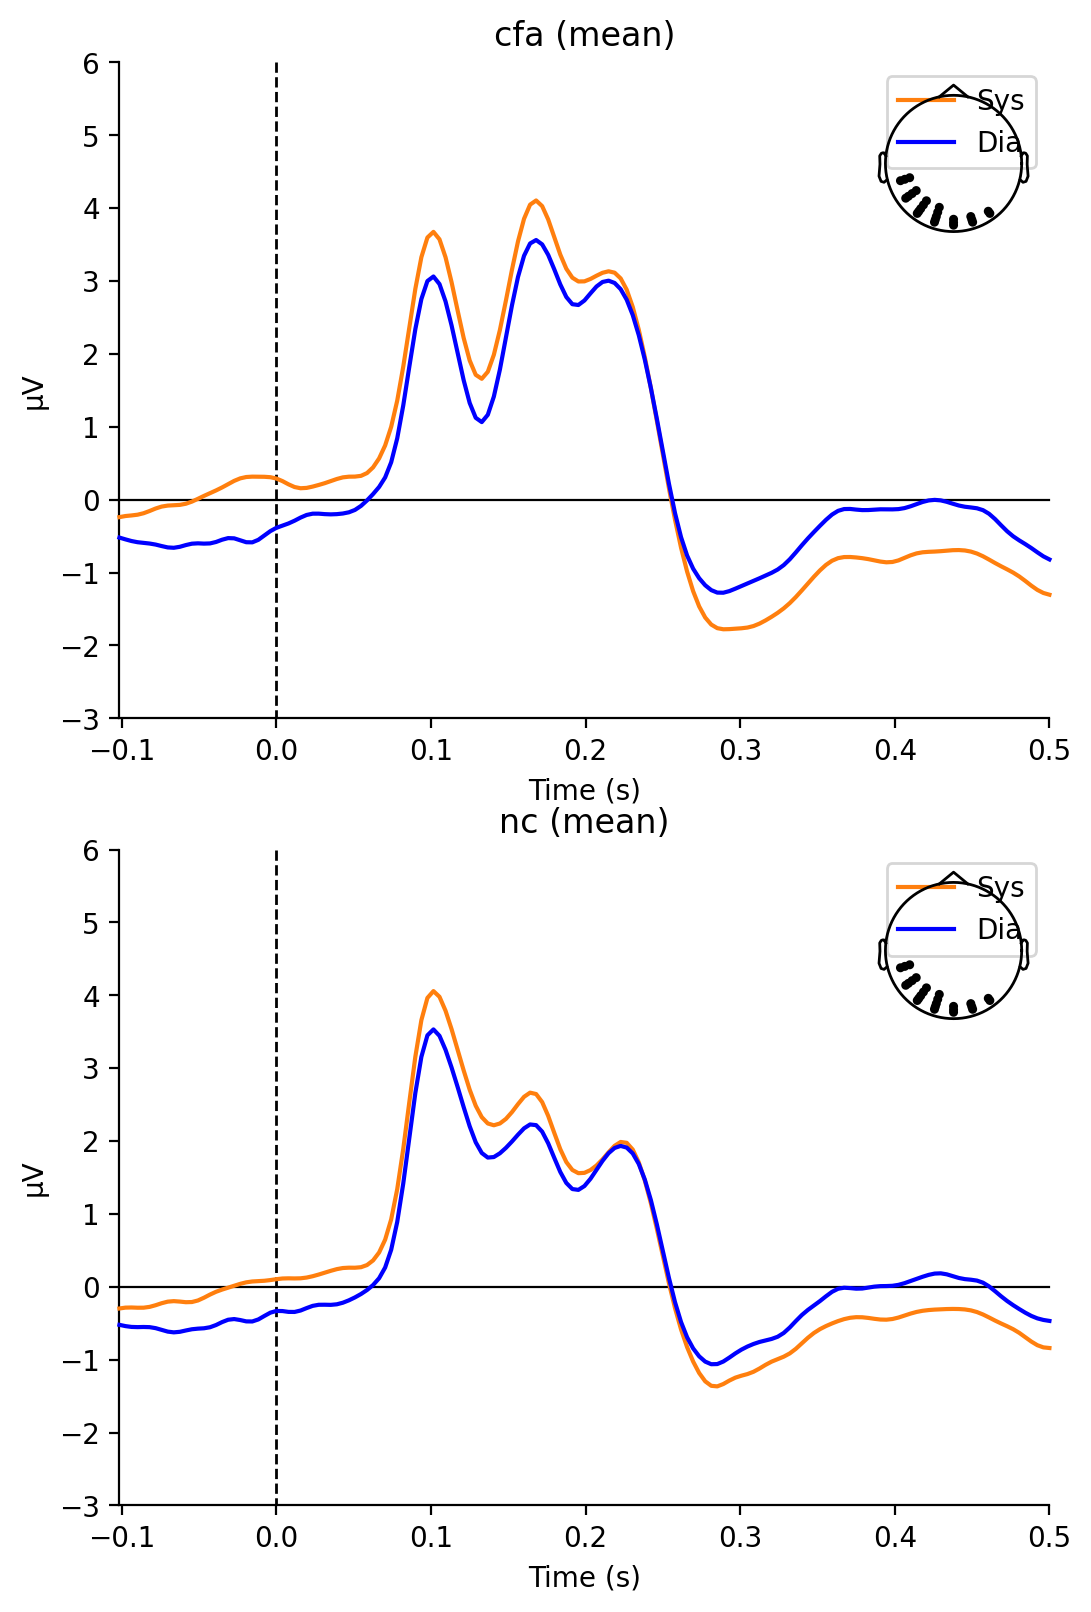

In [98]:
fig_fin[0]

## Figure 2 B C D template
set phy_sig to cardiac_phase and to rsp_phase to get two different outcomes
the picks define the regions to plot (they will automatically appear on the figure to know exactly their position on the EEG)



In [8]:
def crop_list(list_ev,crop_value):
    list_cropped=[]
    for cond in list_ev:
        cond_crop=[evo.crop(crop_value[0],crop_value[1]) for evo in cond]
        list_cropped.append(cond_crop)
    return list_cropped




In [9]:
picks_P1=['D32','A11','A12','A13','A14','A24','A25','A26','A27','B8','B9','B10']



picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']

picks_LP=['A2','A3','A4','A19','A20','A21','A22','A32','A31','A30','A29','A5','A18',
          'A17','A16','A8','A9','A6','A7','D29','D30','D15','D16','D17','D28','D27']

picks_P3a=['C11','C12','C13','C14','C15','C18','C19','C20','C21','C22','C25','C26','C27','C28','C32','D4']



In [17]:
crop_value=[-0.1,0.5]
phy_sig='rsp_phase'
rsp_cond='o'
picks_ERP={'P1':picks_P1,'VAN':picks_VAN,'LP':picks_LP}

In [18]:
%matplotlib qt
cond_1_awa="aware_"
cond_2_awa="unaware_"
cond_3_awa="aware_"
cond_4_awa="unaware_"
if phy_sig=='rsp_phase':

    cond_1_phy="inh"
    cond_2_phy="inh"
    cond_3_phy="exh"
    cond_4_phy="exh"
elif phy_sig=='cardiac_phase':
    cond_1_phy="sys"
    cond_2_phy="sys"
    cond_3_phy="dia"
    cond_4_phy="dia"
elif phy_sig==None:
    cond_1_phy=""
    cond_2_phy=""
    cond_3_phy=""
    cond_4_phy=""
if rsp_cond=='o':
    rsp_cond_lab='tsk_o_'
elif rsp_cond=='n':
    rsp_cond_lab=''

cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_1_phy}_list'))
cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_2_phy}_list'))
cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_3_awa}{cond_3_phy}_list'))
cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_4_awa}{cond_4_phy}_list'))
#picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
           #'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']


cond_1,cond_2,cond_3,cond_4=crop_list([cond_1,cond_2,cond_3,cond_4],crop_value)

#picks=['A13','A14','A24','A25','A26','A27']
#picks=['A7','A9','A19','D29','D30','D31']
#picks=['A26','B8','B9','B10']
cond_1_lab=f"{cond_1_awa}{cond_1_phy}"
cond_2_lab=f"{cond_2_awa}{cond_2_phy}"
cond_3_lab=f"{cond_3_awa}{cond_3_phy}"
cond_4_lab=f"{cond_4_awa}{cond_4_phy}"
evokeds = {f"{cond_1_lab}":cond_1,

           f"{cond_2_lab}":cond_2,

            f"{cond_3_lab}":cond_3,

           f"{cond_4_lab}":cond_4}






ana/MNE/evo_list/maskON/mistake/nc/xns/norm/maskON_mistake_nc_xns_norm_unaware_sys_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_inh_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.47 × vep/normal/correct/aware/dia/inh + 0.53 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 104 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.52 × vep/normal/correct/aware/dia/inh + 0.48 × vep/normal/correct/aware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 153 - aspect type = 100
Projection

## Define df  for P1 picture
the barplot is based on the P1 electrodes while the lineplots are based on the VAN

In [19]:
region_ax1="P1"
crop_period=[0.09, 0.12]
erp_df=s_hp.get_erp_df(evokeds.copy(),crop_period,picks_ERP[region_ax1])


(30, 12, 9)
(30, 12, 9)
(30, 12, 9)
(30, 12, 9)


### P1 electrodes loc
fig=plt.figure(figsize=(3,3))
ax=plt.gca()
mne.viz.plot_sensors(cond_1[0].info,axes=ax,pointsize=35)
fig_path=f'ana/results_report/images/el_waveform/P1_topo.svg'
fig.savefig(fig_path,dpi=1200,format='svg')

In [20]:
erp_df=pd.DataFrame.from_dict(erp_df)
erp_df['id']=erp_df.index
wide1=pd.wide_to_long(erp_df,stubnames=['aware','unaware'],i='id',j=phy_sig,sep="_",suffix='\D+')
wide1.rename(columns=dict(aware='AmplitudeAware',unaware='AmplitudeUnaware'),inplace=True)
wide1.reset_index(inplace=True)
wide2=pd.wide_to_long(wide1,stubnames=['Amplitude'],i=[phy_sig,'id'],j='Awareness',sep="",suffix='\D+')
wide2.reset_index(inplace=True)
wide2

rsp_phase  id Awareness     Amplitude
0         inh   0     Aware -1.321727e-06
1         inh   0   Unaware -7.872269e-07
2         inh   1     Aware  7.297494e-06
3         inh   1   Unaware  7.534597e-06
4         inh   2     Aware -4.354807e-06
..        ...  ..       ...           ...
115       exh  27   Unaware  5.443935e-06
116       exh  28     Aware  1.292614e-05
117       exh  28   Unaware  1.179038e-05
118       exh  29     Aware  4.061486e-06
119       exh  29   Unaware  4.195193e-06

[120 rows x 4 columns]

In [21]:
import pingouin as pg
pg.rm_anova(data=wide2,dv='Amplitude',within=['Awareness',phy_sig],subject='id')

Source            SS  ddof1  ddof2            MS         F  \
0              Awareness  2.221227e-13      1     29  2.221227e-13  0.585436   
1              rsp_phase  3.127574e-15      1     29  3.127574e-15  0.011383   
2  Awareness * rsp_phase  2.627262e-13      1     29  2.627262e-13  1.030590   

      p-unc  p-GG-corr       ng2  eps  
0  0.450372   0.450372  0.000153  1.0  
1  0.915767   0.915767  0.000002  1.0  
2  0.318416   0.318416  0.000181  1.0

In [22]:
pg.pairwise_tests(data=wide2,dv='Amplitude',within=[phy_sig,'Awareness'],subject='id',padjust='fdr_bh')

Contrast rsp_phase      A        B Paired  Parametric  \
0              rsp_phase         -    exh      inh   True        True   
1              Awareness         -  Aware  Unaware   True        True   
2  rsp_phase * Awareness       exh  Aware  Unaware   True        True   
3  rsp_phase * Awareness       inh  Aware  Unaware   True        True   

          T   dof alternative     p-unc    p-corr p-adjust   BF10    hedges  
0  0.106693  29.0   two-sided  0.915767       NaN      NaN  0.195  0.002866  
1  0.765138  29.0   two-sided  0.450372       NaN      NaN  0.254  0.024125  
2  1.260357  29.0   two-sided  0.217588  0.435176   fdr_bh  0.399  0.050504  
3 -0.050826  29.0   two-sided  0.959813  0.959813   fdr_bh  0.195 -0.002085

In [110]:
pg.pairwise_tests(data=wide2,dv='Amplitude',within=['Awareness',phy_sig],subject='id',padjust='fdr_bh')

Contrast Awareness      A        B Paired  Parametric  \
0              Awareness         -  Aware  Unaware   True        True   
1              rsp_phase         -    exh      inh   True        True   
2  Awareness * rsp_phase     Aware    exh      inh   True        True   
3  Awareness * rsp_phase   Unaware    exh      inh   True        True   

          T   dof alternative     p-unc    p-corr p-adjust   BF10    hedges  
0  0.765138  29.0   two-sided  0.450372       NaN      NaN  0.254  0.024125  
1  0.106693  29.0   two-sided  0.915767       NaN      NaN  0.195  0.002866  
2  0.913282  29.0   two-sided  0.368625  0.581735   fdr_bh  0.285  0.028535  
3 -0.557098  29.0   two-sided  0.581735  0.581735   fdr_bh  0.224 -0.023596

In [61]:
dv='Amplitude'

dict_awa_list={}



for awa in wide2['Awareness'].unique():


    awa_df=wide2[wide2['Awareness']==awa][[dv,phy_sig]]
    for phases in wide2[phy_sig].unique():
        awa_card=awa_df[awa_df[phy_sig]==phases]
        mean_card_awa=awa_card.mean()[dv]
        sem_card_awa=awa_card.sem()[dv]
        dict_awa_list[f'{awa}_{phases}']={'mean':mean_card_awa,'sem':sem_card_awa}
        #dict_awa_list.append(dict_awa)

C:\Users\Vivi\AppData\Local\Temp\ipykernel_14644\849930333.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_card_awa=awa_card.mean()[dv]
C:\Users\Vivi\AppData\Local\Temp\ipykernel_14644\849930333.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sem_card_awa=awa_card.sem()[dv]
C:\Users\Vivi\AppData\Local\Temp\ipykernel_14644\849930333.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_card_awa=awa_card.mean()[dv]
C:\Users\Vivi\AppData\Local\Temp\ipykernel_14644\84993

In [62]:
dict_awa_list

{'Aware_sys': {'mean': 3.8963591994546885e-06, 'sem': 6.333257467205501e-07},
 'Aware_dia': {'mean': 3.3752436231005422e-06, 'sem': 6.822292580175393e-07},
 'Unaware_sys': {'mean': 3.91774221766059e-06, 'sem': 6.167007376505177e-07},
 'Unaware_dia': {'mean': 3.1704537258614856e-06, 'sem': 6.621379589265313e-07}}

In [63]:
%matplotlib qt
#cm=1/2.54 #cm in inches
fig_fin,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12,12),gridspec_kw={'width_ratios':[2,3]})
if phy_sig=='rsp_phase':
    color_list=['g','g','tab:pink','tab:pink']
    facecolor_list=['w','g','w','tab:pink']
    xticklab=['inhalation', 'exhalation']
    xlab='respiratory phase'
    cond_list=['Aware_inh','Unaware_inh','Aware_exh','Unaware_exh']
    y_lim_plot=2.5e-6
else:
    color_list=['tab:orange','tab:orange','b','b']
    facecolor_list=['w','tab:orange','w','b']
    xticklab=['systole','diastole']
    xlab='cardiac phase'
    cond_list=['Aware_sys','Unaware_sys','Aware_dia','Unaware_dia']
    y_lim_plot=6e-6


hatch_list=['///','','///','']
adj_list=[0,-0.4,-0.45,-0.85]
#color_list=['tab:orange','tab:orange','b','b']
#facecolor_list=['w','tab:orange','w','b']

alpha_list=[1,0.6,1,0.6]
x=0

for cond,color,hatch,adj,facecolor,alpha in zip(cond_list,color_list,hatch_list,adj_list,facecolor_list,alpha_list):


    fig_fin=ax3.bar(x=x+adj,height=[dict_awa_list[cond]['mean']],facecolor=facecolor,yerr=[dict_awa_list[cond]['sem']],
           edgecolor=color,hatch=hatch,linewidth=2.5,capsize=(2),ecolor='0.3',
                    width=0.5,label=cond.split('_')[0]+' '+cond.split('_')[1],alpha=alpha)
    x+=1

fig_fin=ax3.set_ylim(None,y_lim_plot)
fig_fin=ax3.set_xticks([0.3,1.85],labels=xticklab,size='x-large')
fig_fin=ax3.set_xlabel(xlab,size='x-large')
fig_fin=ax3.set_ylabel(f'{region_ax1} amplitude (uV)',size='x-large')
fig_fin=ax3.spines['top'].set_visible(False)
fig_fin=ax3.spines['right'].set_visible(False)

fig_fin=ax3.legend(bbox_to_anchor=(1,1),fontsize='large')

## Define df  for VAN picture
the barplot is based on the P1 electrodes while the lineplots are based on the VAN
unfortunately i need to reload the evoked, i cannot find a way of safely deep copy the objects, so the info structure get modified and some channels are dropped

In [64]:
%matplotlib qt
cond_1_awa="aware_"
cond_2_awa="unaware_"

if phy_sig=='rsp_phase':
    cond_1_phy="inh"
    cond_2_phy="exh"

elif phy_sig=='cardiac_phase':
    cond_1_phy="sys"
    cond_2_phy="dia"
elif phy_sig==None:
    cond_1_phy=""
    cond_2_phy=""


cond_1=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_1_phy}_list'))
cond_2=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_1_phy}_list'))
cond_3=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_1_awa}{cond_2_phy}_list'))
cond_4=mne.read_evokeds(filter_list_equal(evo_files,f'{rsp_cond_lab}maskON_correct_cfa_vep_norm_{cond_2_awa}{cond_2_phy}_list'))
#picks_VAN=['D32','A9','A10','A11','A12','A16','A15','A14','A13',
#'A22','A23','A24','A25','A29','A28','A27','A26','B6','B7','B8','B9','B10']


cond_1,cond_2,cond_3,cond_4=crop_list([cond_1,cond_2,cond_3,cond_4],crop_value)

#picks=['A13','A14','A24','A25','A26','A27']
#picks=['A7','A9','A19','D29','D30','D31']
#picks=['A26','B8','B9','B10']
cond_1_lab=f"{cond_1_awa}{cond_1_phy}"
cond_2_lab=f"{cond_2_awa}{cond_1_phy}"
cond_3_lab=f"{cond_1_awa}{cond_2_phy}"
cond_4_lab=f"{cond_2_awa}{cond_2_phy}"
evokeds = {f"{cond_1_lab}":cond_1,

           f"{cond_2_lab}":cond_2,

           f"{cond_3_lab}":cond_3,

           f"{cond_4_lab}":cond_4}





ana/MNE/evo_list/maskON/mistake/nc/xns/norm/maskON_mistake_nc_xns_norm_unaware_sys_list-ave.fif
Reading ana/MNE/evo_list/maskON/correct/cfa/vep/norm/tsk_o_maskON_correct_cfa_vep_norm_aware_sys_list-ave.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.42 × vep/normal/correct/aware/sys/exh + 0.58 × vep/normal/correct/aware/sys/inh
 G_n= g01)
        0 CTF compensation matrices available
        nave = 95 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
No baseline correction applied
    Read a total of 1 projection items:
        Average EEG reference (1 x 128) active
    Found the data of interest:
        t =    -199.22 ...    1000.00 ms (0.40 × vep/normal/correct/aware/sys/exh + 0.60 × vep/normal/correct/aware/sys/inh
 G_n= g03)
        0 CTF compensation matrices available
        nave = 121 - aspect type = 100
Projections

In [65]:
region_ax2="VAN"

picked=picks_ERP[region_ax2]
if phy_sig=='rsp_phase':
    colors=['olivedrab','tab:green','tab:pink','purple']
elif phy_sig=='cardiac_phase':
    colors=['tab:orange','r','c','b']
#fig_fin,axs=plt.subplots(2,figsize=(8,12))

fig_fin=mne.viz.plot_compare_evokeds(evokeds, combine='mean',ci=False, picks=picked,show_sensors=True,colors=colors,
                                     styles={cond_1_lab:{"linewidth":1.5},cond_2_lab:{"linewidth":1.5},cond_3_lab:{"linewidth":1.5},cond_4_lab:{"linewidth":1.5}},axes=ax2,
                                    legend='upper right',linestyles=['-.','-','-.','-'],ylim=dict(eeg=[-3,6]),truncate_yaxis=False)
fig_fin=fig_fin[0]

#ylim=dict(eeg=[-3,5.5])

png=f'{rsp_cond_lab}CACU_{phy_sig}_{region_ax2}.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'


#fig_evo[0].savefig(fig_path,dpi=600,format='svg')




More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


In [66]:
if phy_sig=='rsp_phase':
    png1='Aware - unaware inh'
    png2='Aware - unaware exh'
    color_1='tab:green'
    color_2='tab:pink'
elif phy_sig=='cardiac_phase':
    png1='Aware - unaware sys'
    png2='Aware - unaware dia'
    color_1='tab:orange'
    color_2='blue'



ts=tTest_ana([cond_1,cond_2],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png1,color=color_1,effect_size='whole',axes=ax4)
ts=tTest_ana([cond_3,cond_4],crop_value=crop_value,FDR=True,plot_times='peaks',averages=0.02,p_val=0.05,picks=picked,png=png2,color=color_2,effect_size='whole',axes=ax4)

#plt.tight_layout()
#ts=tTest_ana([cond5,cond6],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png3,plot_sig_lines=False)
#ts=tTest_ana([cond7,cond8],crop_value=data_shape,FDR=False,plot_times='peaks',averages=0.02,p_val=0.01,picks=picks_VAN,png=png4)
#plt.tight_layout()


png=f'{rsp_cond_lab}CACU_{phy_sig}_{region_ax1}_{region_ax2}.svg'
fig_path=f'ana/results_report/images/el_waveform/{png}'

fig_fin.savefig(fig_path,dpi=1200,format='svg')



(30, 22, 155)
(30, 22, 155)
(155,)
(155,)
showing effect sizes
155
(30, 22, 155)
(30, 22, 155)
(155,)
(155,)
showing effect sizes


C:\Users\Vivi\switchdrive\BBC\WP1\data\Code\python\BBC\stats\stats_helper.py:180: RuntimeWarning: All-NaN slice encountered
  y_01_idx = np.where(sig_value_01 == np.nanmax(sig_value_01))


155


In [67]:
fig_fin.show()